<a href="https://colab.research.google.com/github/ashutosh-619/The-Sparks-Foundation-Internship/blob/main/Task_3_EDA_Retail.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Task: Perform Exploratory Data Analysis on dataset ‘SampleSuperstore'**

In [1]:
#We start by importing the basic libraries.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
#We load the dataset into a dataframe 'df' using the read_csv function.
df = pd.read_csv('SampleSuperstore.csv')

In [3]:
#The head fuction displays the first five rows of the dataset.
df.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [4]:
#Print the shape of the dataset.
df.shape

(9994, 13)

In [5]:
#Display some general information about the dataset.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [6]:
#Postal Code column being of type 'int64' can cause problems later since pandas and numpy will treat it as a numerical variable, thus creating confusions in heatnatp, etc.
#Therefor we change its type to object.
df['Postal Code'] = df['Postal Code'].astype('object')

In [7]:
#Print some properties of some columns of the dataset.
df.describe()

,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000
mean,229.858001,3.789574,0.156203,28.656896
std,623.245101,2.225110,0.206452,234.260108
min,0.444000,1.000000,0.000000,-6599.978000
25%,17.280000,2.000000,0.000000,1.728750
50%,54.490000,3.000000,0.200000,8.666500
75%,209.940000,5.000000,0.200000,29.364000
max,22638.480000,14.000000,0.800000,8399.976000


In [8]:
#Checking if there are any missing values present in the dataset.
df.isna().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

In [9]:
#As we can observe, there are no missing values in any of the columns of the dataset.

In [10]:
#This function basically lists out the counts of all the unique values in each of the columns of the dataset.
#We can use this function to determine the categorical variables in our dataset.
df.nunique()

Ship Mode          4
Segment            3
Country            1
City             531
State             49
Postal Code      631
Region             4
Category           3
Sub-Category      17
Sales           5825
Quantity          14
Discount          12
Profit          7287
dtype: int64

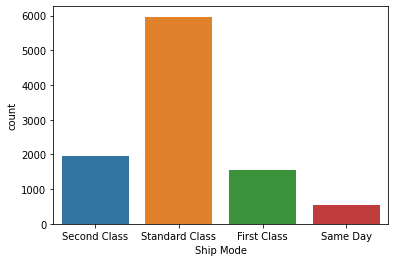

In [11]:
#Plottting the counts of the categories in the Ship Mode column
sns.countplot(x='Ship Mode', data=df)

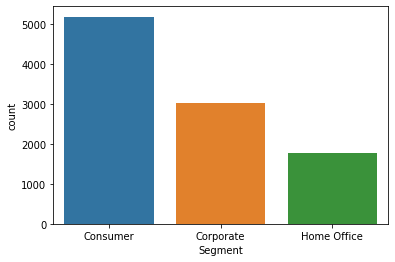

In [12]:
sns.countplot(x='Segment', data=df)

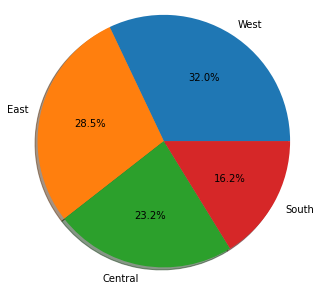

In [13]:
fig = plt.figure(figsize=(5, 5)) 
labels  = 'West' , 'East', 'Central', 'South'
lst = df['Region'].value_counts()
lst = list(lst)
plt.pie(lst, labels=labels , autopct ='%1.1f%%', shadow=True)
plt.axis('equal')
plt.show()                                                 

In [14]:
#Now, we obtain the correlations among the numerical columns of the dataset.
#We use the corr function for this, and it automatically makes use of the numerical columns only, thus eliminating the need for us to manually select them.

X_corr = df.iloc[:,0:13]  #independent columns
y_corr = df.iloc[:,-1]   
#get correlations of each features in dataset
corrmat = df.corr()
corrmat

,Sales,Quantity,Discount,Profit
Sales,1.000000,0.200795,-0.028190,0.479064
Quantity,0.200795,1.000000,0.008623,0.066253
Discount,-0.028190,0.008623,1.000000,-0.219487
Profit,0.479064,0.066253,-0.219487,1.000000


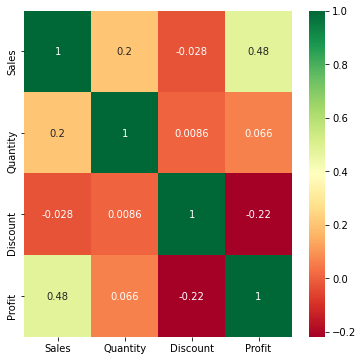

In [15]:
#We turn the above correlation matrix into a heatmap for better visualization.
#By seeing the heatmap, we can infer that some features are positivelu correlated to the Profit variable, whereas some are negatively correlated.
top_corr_features = corrmat.index
plt.figure(figsize=(6,6))
#plot heat map
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

**The main observations that we can conclude by seeing the above heatmap is that the sales column in highly correlated with the Profit column (which should be obvious), and also that the discount column is actually negatively correlated with the Profit column.**

In [16]:
#To get an idea regarding which state has the highest amount of orders placed.
df['State'].value_counts()

California              2001
New York                1128
Texas                    985
Pennsylvania             587
Washington               506
Illinois                 492
Ohio                     469
Florida                  383
Michigan                 255
North Carolina           249
Virginia                 224
Arizona                  224
Georgia                  184
Tennessee                183
Colorado                 182
Indiana                  149
Kentucky                 139
Massachusetts            135
New Jersey               130
Oregon                   124
Wisconsin                110
Maryland                 105
Delaware                  96
Minnesota                 89
Connecticut               82
Missouri                  66
Oklahoma                  66
Alabama                   61
Arkansas                  60
Rhode Island              56
Mississippi               53
Utah                      53
Louisiana                 42
South Carolina            42
Nevada        

In [17]:
#To see which sub-categories are ordered the most
df['Sub-Category'].value_counts()

Binders        1523
Paper          1370
Furnishings     957
Phones          889
Storage         846
Art             796
Accessories     775
Chairs          617
Appliances      466
Labels          364
Tables          319
Envelopes       254
Bookcases       228
Fasteners       217
Supplies        190
Machines        115
Copiers          68
Name: Sub-Category, dtype: int64

In [18]:
#Creating a new dataframe which consists of just the orders in which there was a loss suffered.
loss_rows = df[df['Profit'] < 0]
loss_rows.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
14,Standard Class,Home Office,United States,Fort Worth,Texas,76106,Central,Office Supplies,Appliances,68.8100,5,0.80,-123.8580
15,Standard Class,Home Office,United States,Fort Worth,Texas,76106,Central,Office Supplies,Binders,2.5440,3,0.80,-3.8160
23,Second Class,Consumer,United States,Philadelphia,Pennsylvania,19140,East,Furniture,Chairs,71.3720,2,0.30,-1.0196
27,Standard Class,Consumer,United States,Philadelphia,Pennsylvania,19140,East,Furniture,Bookcases,3083.4300,7,0.50,-1665.0522


In [19]:
loss_rows.shape

(1871, 13)

In [20]:
loss_rows['State'].value_counts()

Texas             486
Pennsylvania      278
Illinois          255
Ohio              209
Florida           126
California        105
Arizona            85
North Carolina     68
Colorado           66
Tennessee          65
New York           47
Oregon             43
Washington         17
Massachusetts       5
Rhode Island        4
Connecticut         2
Maryland            2
New Jersey          2
Delaware            2
New Mexico          1
New Hampshire       1
Nevada              1
West Virginia       1
Name: State, dtype: int64

**We again printed the count of State column for the loss_rows dataframe and if we compare this to the original values, it can be inferred that the top 4 states here, i.e. Texas, Pennysylvania, Illinois and Florida incur losses almost 50% of the times. For example, out of the 985 orders placed in Texas, 486 of them caused losses.**

In [21]:
disc_loss_rows = loss_rows[loss_rows['Discount'] > 0.3]

In [22]:
disc_loss_rows.shape

(1140, 13)

**This new dataframe is for those rows wherein the discount was greater than 0.3. It has 1140 rows, which is approxiamately 61% of the total number of rows in the loss_rows dataframe which implies that 61% of the times there is a loss suffered, the discount would have been greater than 0.3.**

**Final Takeaways:**

**1. It was observed that purchases in certain states incur losses for about 50% of the times.**

**2. It was also seen that a discount of value greater than 0.3 incurs losses around 61% of the times.**